# HW2_2
Using a small part of clinvar_20220624.vcf to

* count how many different types corresponding numbers of CLNSIG

* store the RS information with tab seperated dataframe

**Please note:**

CLNSIG information may have multiple annotations such as

1.   CLNSIG=Pathogenic|_risk_factor
2.   CLNSIG=Conflicting_interpretations_of_pathogenicity|_other

Remember to "split" them with "|_" to get two CLNSIG information (Pathogenic and risk_factor) in example1


---



**OUTPUT FORMAT**

**For problem1 Please "sort" the ouput alphabetically (from uppercase to lowercase)**
Use whatever reasonable plot to show "the number"
.jpg / .png

**For problem2 Using "tab seperate" to store the output of file**

**if there is no RS information in INFO, using "." to represent**

Save the result of Problem 1 as **HW2_2_python_{your_name}.jpg/.png**, Problem 2 as **HW2_2_python_{your_name}.txt** and also the **HW2_2_python_{your_name}.py/.ipynb** file also email to r11631004@g.ntu.edu.tw

---

CHROM POS ID REF ALT RS

1 861332 1019397 G A 1640863258

1 861336 1543320 C T .

...


---

**Scoring Rules:**

10% Run"time" (try to use module to know about your runtime and improve your algorithm!)

10% Output format (using correct format to reduce my work can get all points here!)

80% Answer accuracy (depends on how many answers you perfectly match in total)

---
**Due date**

**2023.07.27 Tuesday 23:59** -> 100%

2023.08.03 Tuesday 23:59 -> 80%

...


---


**Feel free to contact me via email or Slack(邱顯鈞, hsien-chun chiu) if you have any problem with this homework.**




In [1]:
pwd

'c:\\Users\\angel\\OneDrive\\桌面\\summer\\2023-summer\\week2\\more_python\\HW2\\python_HW2_2'

In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter

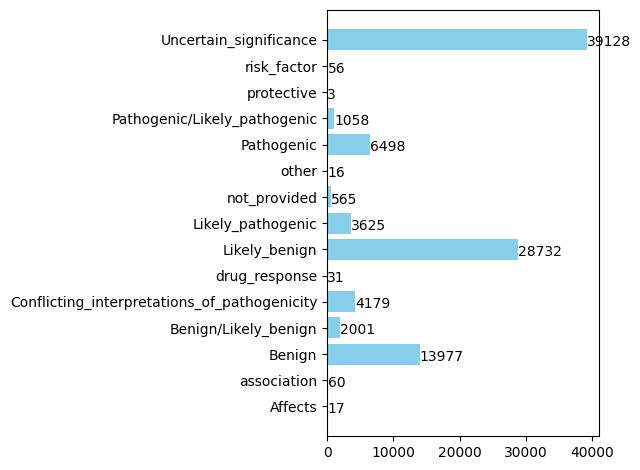

In [3]:
with open('HW2_2_python_clinvar.vcf\HW2_2_python_clinvar.vcf', "r") as f:
    for line in f:
        if line.startswith("#CHROM"):
            header = line.strip().split("\t")
            header[0] = header[0].lstrip("#")
            break

df = pd.read_csv('HW2_2_python_clinvar.vcf\HW2_2_python_clinvar.vcf', comment="#", sep='\t', header=None)
df.columns = header
df['CLNSIG'] = df['INFO'].str.split(';').apply(lambda x: [c.split('=')[1] for c in x if c.startswith('CLNSIG=')])
clnsig = []
for i in df['CLNSIG']:
    if i != []:
        if '|_' in i[0]:
             i = i[0].split('|_')
             for k in range(len(i)):
                 clnsig.append(i[k])
        else:
            clnsig.append(i[0])

word_counts = Counter(clnsig)
type = []
for word, count in word_counts.items():
    type.append([word, count])
type = sorted(type, key=lambda x:x[0].lower())
type, frequencies = zip(*type)
plt.barh(type, frequencies, color = 'skyblue')
for i, v in enumerate(frequencies):
    plt.text(v, i-0.25, str(v))
plt.tight_layout()
plt.savefig('HW2_2_python_晏文芳.png')
plt.show()
df['RS'] = df['INFO'].str.split(';').apply(lambda x: [c.split('=')[1] for c in x if c.startswith('RS=')])
df.insert(5, 'RS', df.pop('RS'))


In [4]:
df = df.iloc[:, :6]
df['RS'] = df['RS'].apply(lambda x: '.' if len(x) == 0 else x)
df['RS'] = df['RS'].apply(lambda x: x[0] if len(x) != '.' else x)
df

,CHROM,POS,ID,REF,ALT,RS
0,1,861332,1019397,G,A,1640863258
1,1,861336,1543320,C,T,.
2,1,861349,1648427,C,T,.
3,1,861356,1362713,T,C,.
4,1,861366,1568423,C,T,.
...,...,...,...,...,...,...
99967,1,215953361,1020626,C,G,567356824
99968,1,215953365,48357,G,A,111033418
99969,1,215953366,1571402,G,T,.
99970,1,215953368,1403889,T,A,.


In [5]:
df.to_csv('HW2_2_python_晏文芳.txt', sep ='\t', index = False)